In [11]:
import numpy as np

In [ ]:
def get_fold_info(fold):
    f = fold.split("=")
    axis = f[0][-1]
    value = int(f[1])
    return axis, value

In [113]:
with open('input.txt') as f:
    data = f.read()

dots, folds = data.split("\n\n")
dots = [list(map(int, d.split(","))) for d in dots.split("\n")]
folds = folds.split("\n")
folds = [l for l in folds if l]
folds = list(map(get_fold_info, folds))

In [114]:
dots

[[691, 418],
 [507, 283],
 [371, 371],
 [21, 710],
 [10, 260],
 [256, 84],
 [601, 892],
 [960, 541],
 [755, 392],
 [90, 411],
 [435, 603],
 [63, 565],
 [1211, 217],
 [328, 719],
 [1186, 325],
 [661, 606],
 [1193, 514],
 [1097, 156],
 [353, 49],
 [673, 341],
 [850, 292],
 [1210, 812],
 [54, 476],
 [1101, 393],
 [982, 719],
 [874, 0],
 [1161, 379],
 [457, 322],
 [440, 340],
 [1012, 670],
 [746, 259],
 [479, 348],
 [1275, 787],
 [505, 94],
 [649, 606],
 [1305, 675],
 [269, 217],
 [443, 238],
 [969, 850],
 [875, 358],
 [149, 514],
 [773, 617],
 [1255, 437],
 [589, 358],
 [100, 789],
 [773, 66],
 [853, 313],
 [1146, 607],
 [815, 78],
 [55, 264],
 [875, 225],
 [162, 74],
 [589, 39],
 [1066, 31],
 [1277, 70],
 [773, 828],
 [815, 750],
 [164, 287],
 [1232, 112],
 [338, 742],
 [440, 676],
 [300, 700],
 [180, 684],
 [132, 740],
 [782, 301],
 [1193, 725],
 [895, 758],
 [828, 497],
 [392, 534],
 [831, 348],
 [479, 124],
 [823, 626],
 [955, 500],
 [853, 322],
 [962, 327],
 [796, 577],
 [1220, 411],

In [115]:
folds

[('x', 655),
 ('y', 447),
 ('x', 327),
 ('y', 223),
 ('x', 163),
 ('y', 111),
 ('x', 81),
 ('y', 55),
 ('x', 40),
 ('y', 27),
 ('y', 13),
 ('y', 6)]

In [120]:
def do_fold(paper, fold):
    axis, value = fold
    if axis == 'x':
        x = value
        left = paper[:x, :]
        right = paper[x+1:2*x+1, :]
        paper[:x, :] += np.flipud(right)
        paper[x+1:2*x+1, :] = 0
    if axis == 'y':
        y = value
        up = paper[:, :y]
        down = paper[:, y+1:2*y+1]
        assert up.shape[1] == down.shape[1]
        paper[:, :y] += np.fliplr(down)
        paper[:, y+1:2*y+1] = 0
    return paper
        

In [124]:
paper = np.zeros((1500, 1500))
for d in dots:
    paper[d[0], d[1]] = 1
for fold in folds:
    paper = do_fold(paper, fold)

In [123]:
np.sum(np.sum(paper > 0))

618

In [132]:
import matplotlib.pyplot as plt

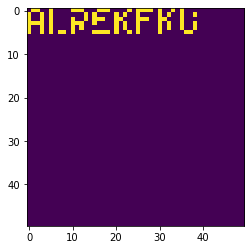

In [137]:
plt.imshow(paper[:50, :50].T > 1)